# Importing Libraries

In [1]:
# Data manipulation and analysis libraries
import numpy as np
import pandas as pd
from math import sqrt

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine learning libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# Importing dataset in pandas 

In [2]:
bike = pd.read_csv("D:\Bike Prediction Project ML\day.csv")

# Dataframe 

In [3]:
# Display the first 5 rows of the DataFrame
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# How many types of each data type column exists and total memory usage
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#Checking the numerical columns data distribution statistics
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Wrangling and Quality Check

In [6]:
# Count the number of missing values in each column
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Checking for Duplicates

In [7]:
bike_dup = bike[~bike.duplicated()]
print(bike_dup.shape)


bike_dup = bike.groupby(list(bike.columns)).apply(lambda x: x.iloc[0])

(730, 16)


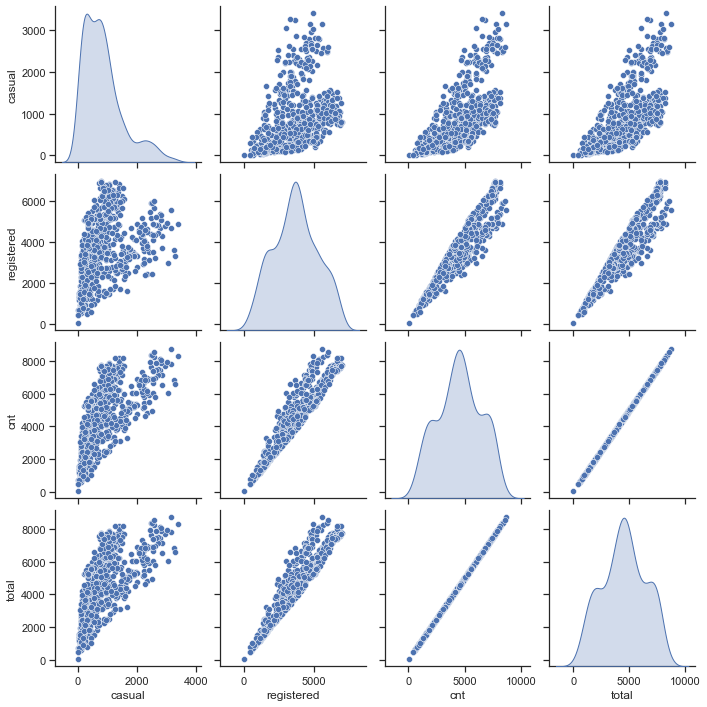

In [8]:
# Select the 'casual', 'registered', and 'cnt' columns
bike_cnt = bike[['casual', 'registered', 'cnt']]

# Create a new column that shows the total number of riders
bike_cnt['total'] = bike_cnt['casual'] + bike_cnt['registered']

# Create a scatter plot matrix to visualize the relationships between the columns
sns.set(style="ticks")
sns.pairplot(bike_cnt, diag_kind="kde")
plt.show()

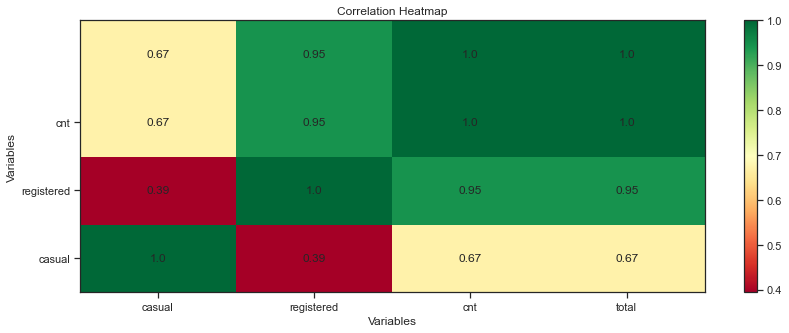

In [9]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(14, 5))

# Create a heatmap using Matplotlib's pcolor method
heatmap = ax.pcolor(bike_cnt.corr(), cmap='RdYlGn')

# Add colorbar
cbar = plt.colorbar(heatmap)

# Set tick labels and positions
ax.set_xticks([0.5, 1.5, 2.5, 3.5])
ax.set_yticks([0.5, 1.5, 2.5])
ax.set_xticklabels(['casual', 'registered', 'cnt', 'total'])
ax.set_yticklabels(['casual', 'registered', 'cnt'])

# Add annotations
for i in range(len(bike_cnt.columns)):
    for j in range(len(bike_cnt.columns)):
        ax.text(i + 0.5, j + 0.5, round(bike_cnt.corr().iloc[i, j], 2), ha='center', va='center')

# Set axis labels and title
ax.set_xlabel('Variables')
ax.set_ylabel('Variables')
ax.set_title('Correlation Heatmap')

# Show the plot
plt.show()

In [10]:
#dropping the unwanted columns
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike.shape

(730, 12)

In [11]:
#Converting season
bike.season.replace((1,2,3,4), ('W1_Spring','W2_Summer','W3_Fall','W4_Winter'), inplace=True)
bike.season.value_counts(normalize=True)

W3_Fall      0.257534
W2_Summer    0.252055
W1_Spring    0.246575
W4_Winter    0.243836
Name: season, dtype: float64

In [12]:
#Converting mnth
bike.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike.mnth.value_counts(normalize=True)

Jan    0.084932
Mar    0.084932
May    0.084932
Jul    0.084932
Aug    0.084932
Oct    0.084932
Dec    0.084932
Apr    0.082192
Jun    0.082192
Sep    0.082192
Nov    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [13]:
#Converting weathersit
bike.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike.weathersit.value_counts(normalize=True)

Clear             0.634247
Misty             0.336986
Light_rainsnow    0.028767
Name: weathersit, dtype: float64

In [14]:
#Converting weathersit
bike.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bike.weekday.value_counts(normalize=True)

Saturday     0.143836
Sunday       0.143836
Monday       0.143836
Tuesday      0.142466
Thursday     0.142466
Friday       0.142466
Wednesday    0.141096
Name: weekday, dtype: float64

# Analyzing categorical variable 

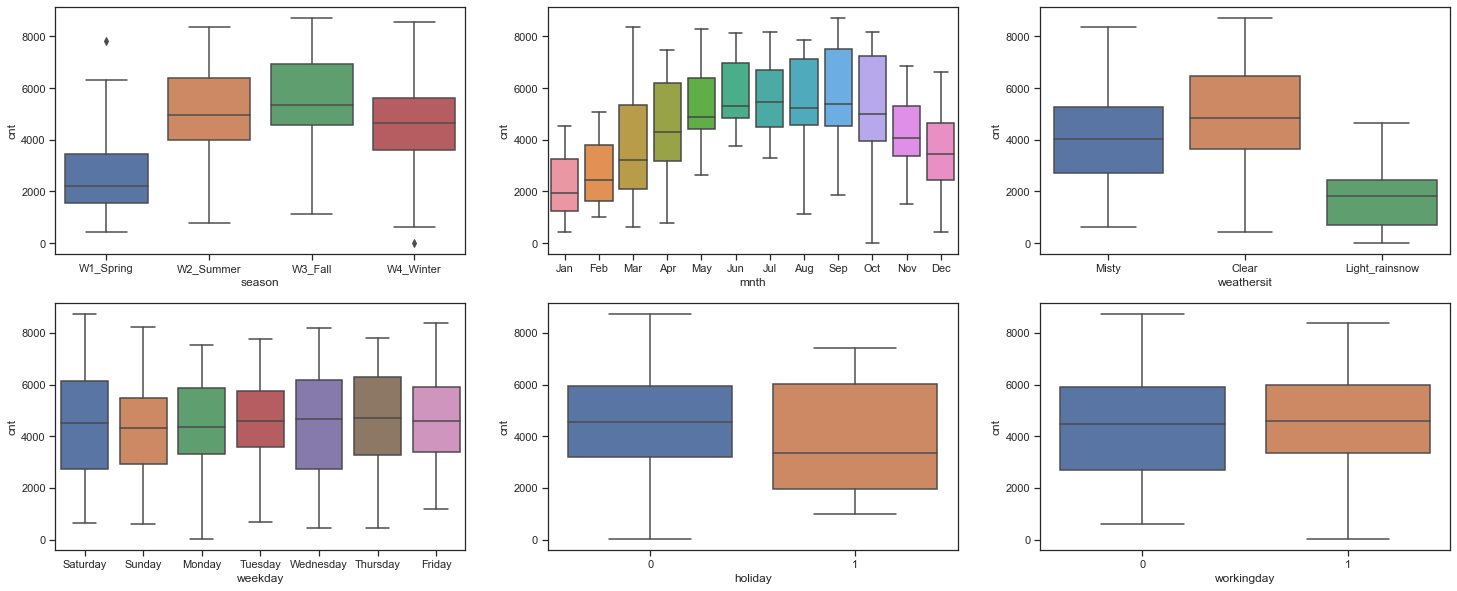

In [15]:
# Define a list of categorical variables to plot
cat_vars = ['season', 'mnth', 'weathersit', 'weekday', 'holiday', 'workingday']

# Create a figure and axis object
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))

# Loop through the categorical variables and plot a boxplot for each one
for i, var in enumerate(cat_vars):
    row = i // 3
    col = i % 3
    sns.boxplot(x=var, y='cnt', data=bike, ax=axes[row, col])

# Show the plot
plt.show()


In [16]:
def categorical_stats(col):
    # Group the DataFrame by the specified column and calculate the sum, mean, and count of the 'cnt' column
    cat_df = bike.groupby(col)['cnt'].agg(['sum', 'mean', 'count'])
    
    # Calculate the percentage of total 'cnt' for each category and add it as a new column
    cat_df['sum_perc'] = cat_df['sum'] / bike['cnt'].sum() * 100
    
    # Calculate the percentage of total rows for each category and add it as a new column
    cat_df['count_perc'] = cat_df['count'] / bike['cnt'].count() * 100
    
    # Round the DataFrame to two decimal places and return it
    return cat_df.round(2)

In [17]:
def categorical_plot(col, x, y):
    # Create a figure and axis object
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(x, y))
    
    # Create a barplot of 'cnt' by the specified column
    sns.barplot(x=col, y='cnt', data=bike, ax=axes[0])
    
    # Create a barplot of 'cnt' by the specified column and year, and add a legend
    sns.barplot(x=col, y='cnt', data=bike, hue='yr', palette='Paired', ax=axes[1])
    axes[1].legend(labels=['2018', '2019'])
    
    # Show the plot
    plt.show()


In [18]:
categorical_stats('season')

,sum,mean,count,sum_perc,count_perc
season,,,,,
W1_Spring,469514,2608.41,180,14.27,24.66
W2_Summer,918589,4992.33,184,27.91,25.21
W3_Fall,1061129,5644.30,188,32.24,25.75
W4_Winter,841613,4728.16,178,25.57,24.38


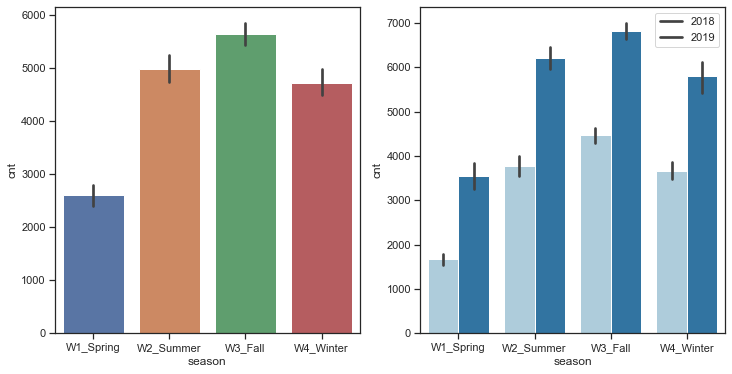

In [19]:
categorical_plot('season',12,6)

In [20]:
categorical_stats('mnth')

,sum,mean,count,sum_perc,count_perc
mnth,,,,,
Apr,269094,4484.90,60,8.18,8.22
Aug,351194,5664.42,62,10.67,8.49
Dec,211036,3403.81,62,6.41,8.49
Feb,149518,2669.96,56,4.54,7.67
Jan,134933,2176.34,62,4.10,8.49
Jul,344948,5563.68,62,10.48,8.49
Jun,346342,5772.37,60,10.52,8.22
Mar,228920,3692.26,62,6.96,8.49
May,331686,5349.77,62,10.08,8.49


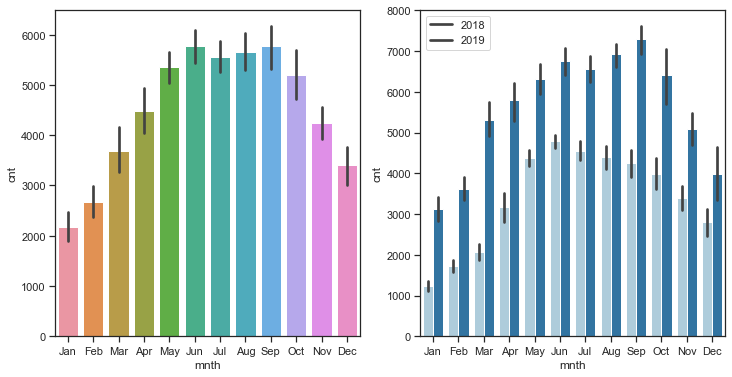

In [21]:
categorical_plot('mnth',12,6)

In [22]:
categorical_stats('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Light_rainsnow,37869,1803.29,21,1.15,2.88
Misty,995024,4044.81,246,30.24,33.70


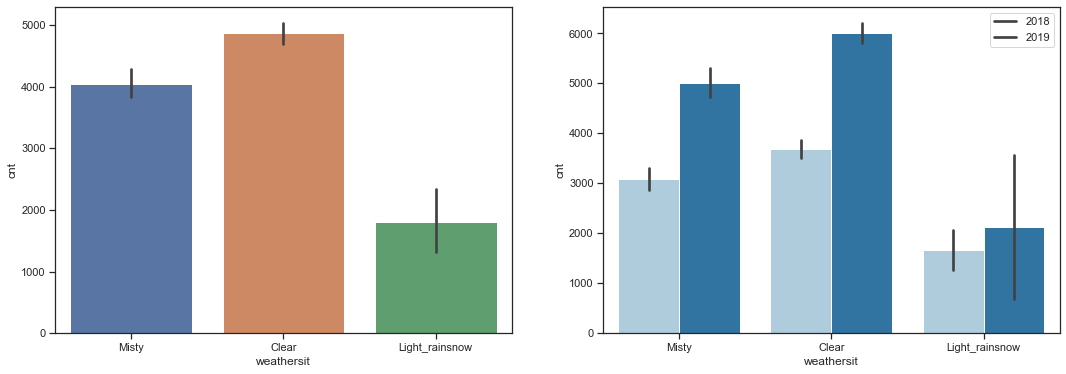

In [23]:
categorical_plot('weathersit',18,6)

In [24]:
categorical_stats('weekday')

,sum,mean,count,sum_perc,count_perc
weekday,,,,,
Friday,487790,4690.29,104,14.82,14.25
Monday,455503,4338.12,105,13.84,14.38
Saturday,477807,4550.54,105,14.52,14.38
Sunday,444027,4228.83,105,13.49,14.38
Thursday,485395,4667.26,104,14.75,14.25
Tuesday,469109,4510.66,104,14.25,14.25
Wednesday,471214,4574.89,103,14.32,14.11


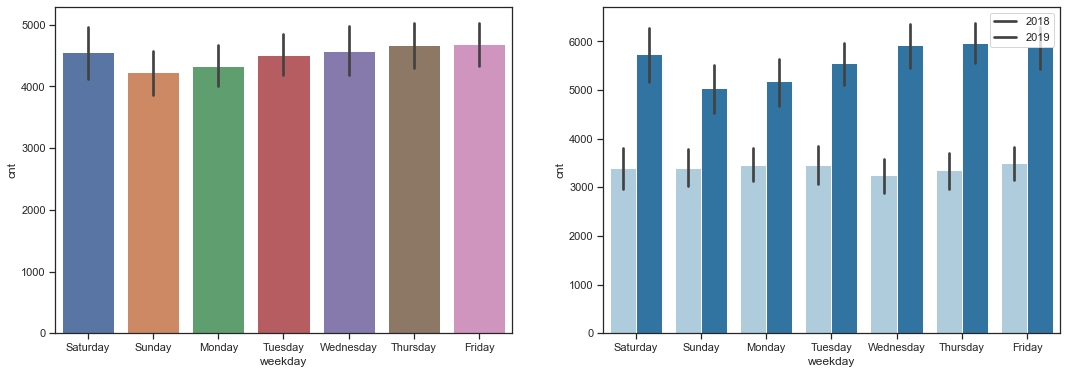

In [25]:
categorical_plot('weekday',18,6)

In [26]:
categorical_stats('holiday')

,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


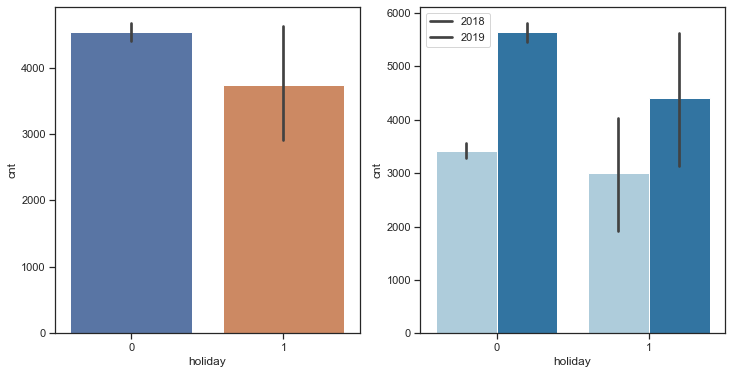

In [27]:
categorical_plot('holiday',12,6)

In [28]:
categorical_stats('workingday')

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
0,1000269,4330.17,231,30.4,31.64
1,2290576,4590.33,499,69.6,68.36


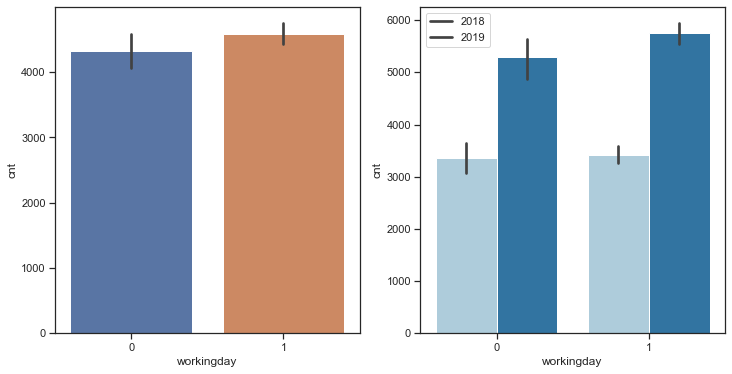

In [29]:
categorical_plot('workingday',12,6)

In [30]:
categorical_stats('yr')

,sum,mean,count,sum_perc,count_perc
yr,,,,,
0,1243103,3405.76,365,37.77,50.0
1,2047742,5610.25,365,62.23,50.0


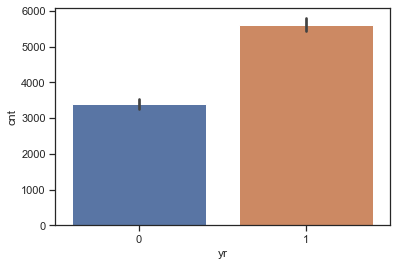

In [31]:
sns.barplot('yr','cnt',data=bike)
plt.show()

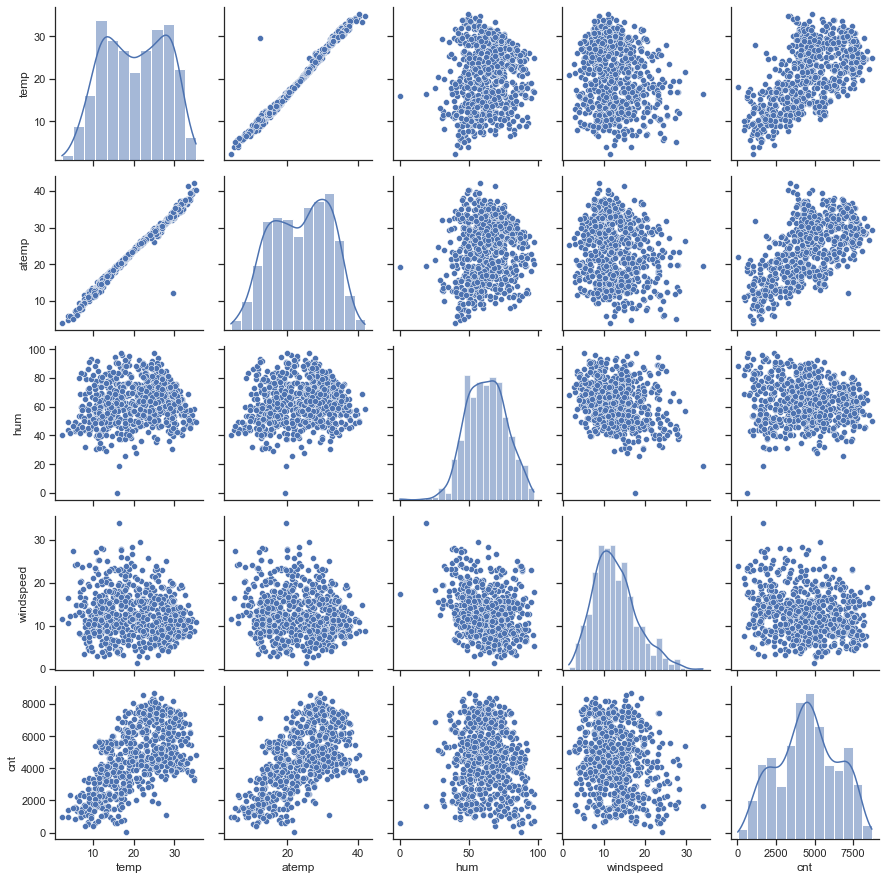

In [32]:
# Select the numeric columns to plot
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Create a pairplot using Seaborn's pairplot function
sns.set(style='ticks')
g = sns.PairGrid(bike[num_cols])
g.map_diag(sns.histplot, kde=True)
g.map_offdiag(sns.scatterplot)
plt.show()


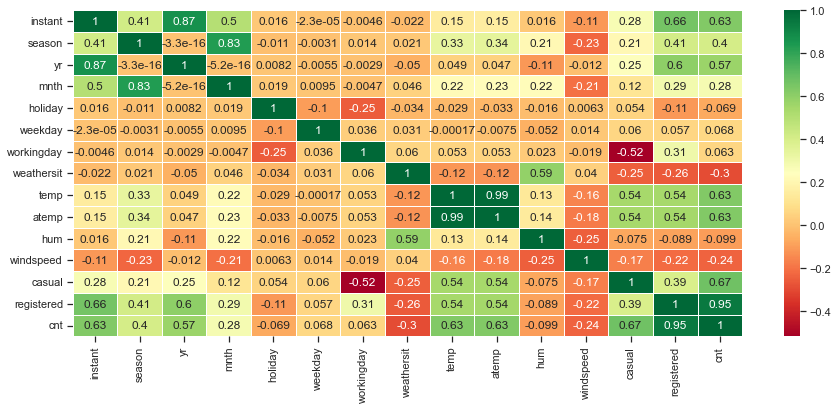

In [33]:
# Checking correlation of the parameters by mapping a correlation heatmap
plt.figure(figsize = (15,6))
ax= sns.heatmap(bike_dup.corr(), annot = True, cmap="RdYlGn",linewidth =1)

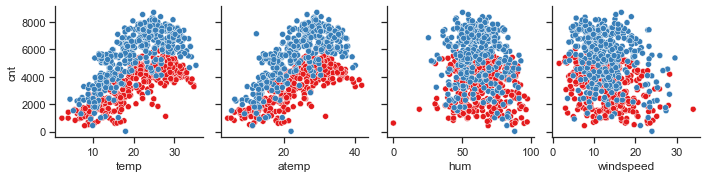

In [34]:
# Checking the impact of year against the numerical variable : 
ax = sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bike, hue='yr', palette='Set1')
ax._legend.remove()
plt.show()

In [35]:
season = pd.get_dummies(bike['season'], drop_first = True)
season.head(3)

,W2_Summer,W3_Fall,W4_Winter
0,0,0,0
1,0,0,0
2,0,0,0


#### Weather

In [36]:
weather = pd.get_dummies(bike['weathersit'], drop_first = True)
weather.head(3)

,Light_rainsnow,Misty
0,0,1
1,0,1
2,0,0


##### Month

In [37]:
month = pd.get_dummies(bike['mnth'], drop_first = True)
month.head(3)

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0


##### Weekday

In [38]:
weekday = pd.get_dummies(bike['weekday'], drop_first = True)
weekday.head(3)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0


In [39]:
# Creating a new dataframe called bike_new where season, month, weather and weekday dataframe is being added
bike_new = pd.concat([bike,season,month,weather,weekday], axis = 1)
bike_new.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,W1_Spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,1,0,0,0,0
1,W1_Spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,0,0,0
2,W1_Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0


In [40]:
bike_new.shape

(730, 34)

In [41]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  W2_Summer       730 non-null    uint8  
 13  W3_Fall         730 non-null    uint8  
 14  W4_Winter       730 non-null    uint8  
 15  Aug             730 non-null    uint8  
 16  Dec             730 non-null    uint8  
 17  Feb             730 non-null    uin

In [42]:
#deleting the unnecessry column season, mnth, weathersit and weekday as the respective values are already populated as binary columns data
bike_new.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bike_new.shape

(730, 30)

In [43]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   W2_Summer       730 non-null    uint8  
 9   W3_Fall         730 non-null    uint8  
 10  W4_Winter       730 non-null    uint8  
 11  Aug             730 non-null    uint8  
 12  Dec             730 non-null    uint8  
 13  Feb             730 non-null    uint8  
 14  Jan             730 non-null    uint8  
 15  Jul             730 non-null    uint8  
 16  Jun             730 non-null    uint8  
 17  Mar             730 non-null    uin

In [44]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 333)

In [45]:
bike_train.shape

(510, 30)

In [46]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.684314,20.218078,23.590696,62.340743,12.771365,4494.103922,0.245098,0.262745,...,0.084314,0.082353,0.025490,0.343137,0.139216,0.150980,0.141176,0.129412,0.141176,0.150980
std,0.500487,0.151726,0.465245,7.500110,8.138271,14.418728,5.205888,1948.315655,0.430568,0.440557,...,0.278131,0.275172,0.157763,0.475223,0.346511,0.358381,0.348545,0.335985,0.348545,0.358381
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.717923,16.744800,51.604150,9.011098,3146.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,23.973425,62.233700,12.125057,4508.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.786653,30.327088,72.958300,15.624869,5962.750000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,96.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
bike_test.shape

(220, 30)

In [48]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.681818,20.553817,24.040727,63.749086,12.745665,4540.236364,0.268182,0.245455,...,0.086364,0.081818,0.036364,0.322727,0.154545,0.127273,0.150000,0.172727,0.145455,0.118182
std,0.501120,0.198531,0.466833,7.533926,8.188064,13.790510,5.184271,1911.199159,0.444023,0.431338,...,0.281541,0.274713,0.187620,0.468586,0.362295,0.334038,0.357886,0.378873,0.353363,0.323559
min,0.000000,0.000000,0.000000,3.957390,4.941955,29.000000,3.875669,506.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.189577,17.366525,53.260450,9.041851,3193.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.756250,24.762725,63.687500,12.146128,4593.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.119778,30.903325,73.333350,15.643227,5959.750000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,28.292425,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
# Rescaling using MinMaxCcaler
scaler = MinMaxScaler()

In [50]:
#Dataframe before scaling 
bike_train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
650,1,0,0,16.126653,19.5698,49.4583,9.791514,7109,0,0,...,1,0,0,0,0,1,0,0,0,0
212,0,0,1,31.638347,35.1646,55.0833,10.500039,4266,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,0,14.862500,18.4969,83.8750,6.749714,3786,0,0,...,0,0,0,1,0,0,1,0,0,0


In [51]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [52]:
#Checking after rescalling
bike_train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,0,0,1,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,1,0,0,1,0,0,0


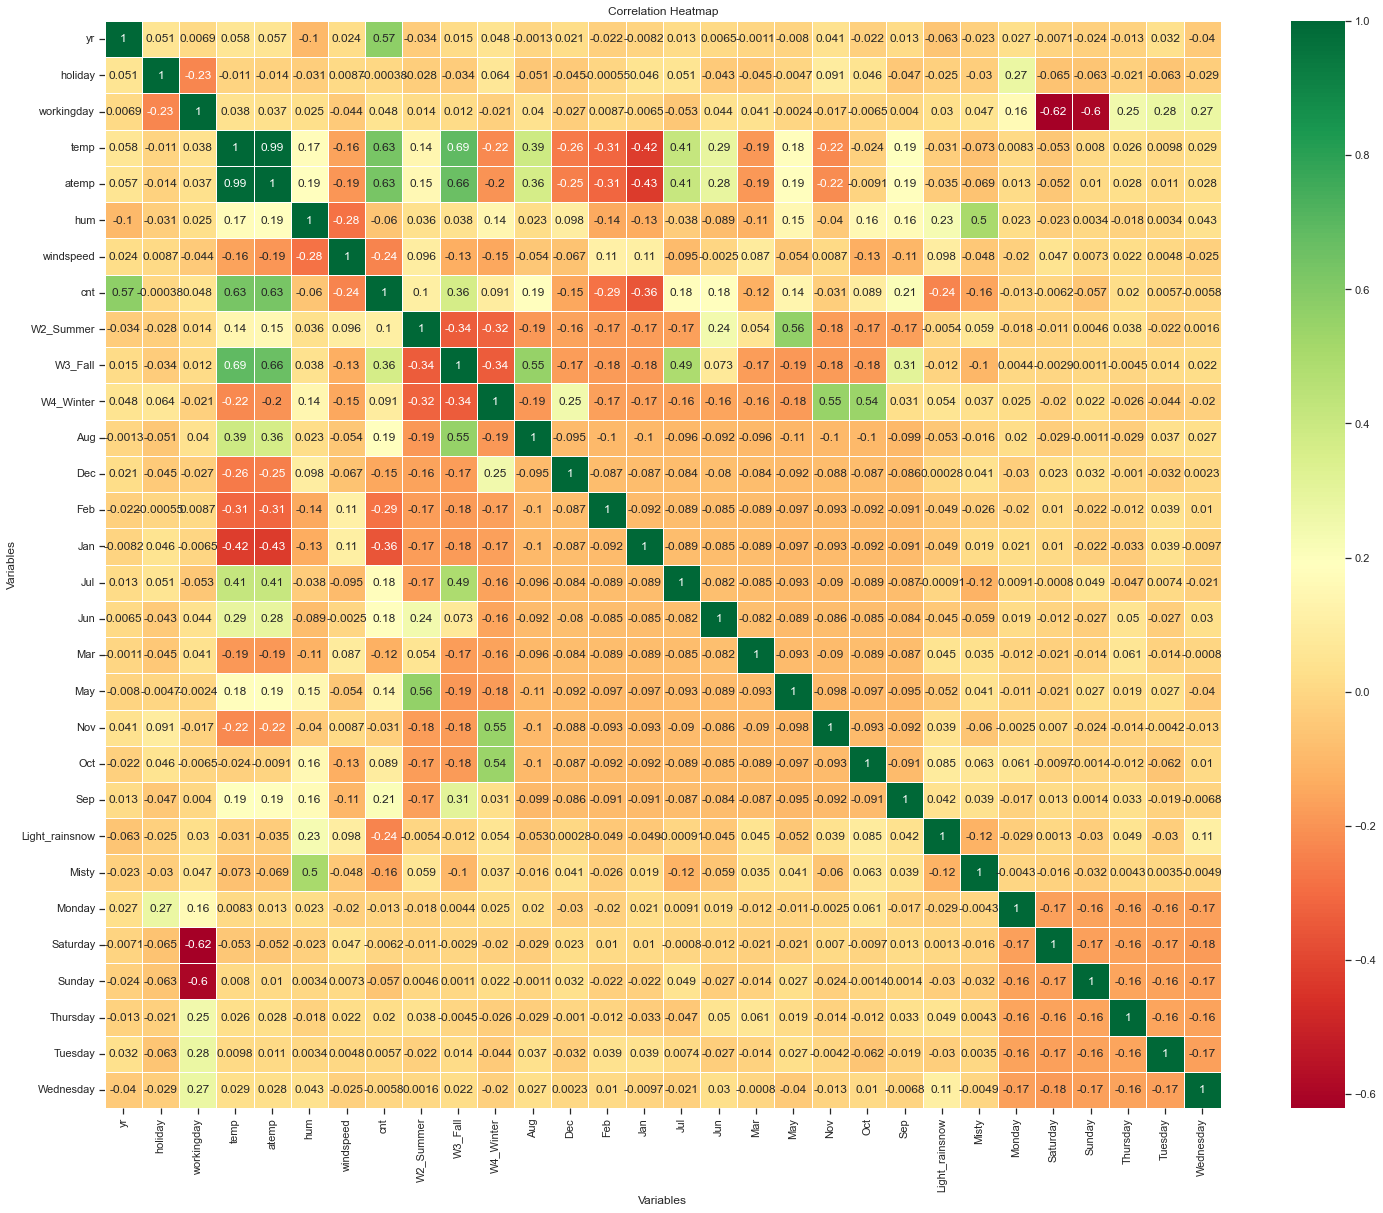

In [53]:
# Create a correlation matrix of the training data
corr_matrix = bike_train.corr()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(25, 20))

# Create a heatmap using Seaborn's heatmap function
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=1, ax=ax)

# Set the axis labels and title
ax.set_xlabel('Variables')
ax.set_ylabel('Variables')
ax.set_title('Correlation Heatmap')

# Show the plot
plt.show()


In [54]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Create a linear regression model and fit it to the training data
lm = LinearRegression()
lm.fit(X_train, y_train)

# Create an RFE object and fit it to the training data
rfe = RFE(lm, n_features_to_select=15).fit(X_train, y_train)

In [56]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 11),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('W2_Summer', True, 1),
 ('W3_Fall', True, 1),
 ('W4_Winter', True, 1),
 ('Aug', False, 9),
 ('Dec', False, 2),
 ('Feb', False, 7),
 ('Jan', False, 6),
 ('Jul', False, 3),
 ('Jun', False, 12),
 ('Mar', True, 1),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Monday', False, 5),
 ('Saturday', True, 1),
 ('Sunday', False, 8),
 ('Thursday', False, 13),
 ('Tuesday', False, 10),
 ('Wednesday', False, 15)]

In [57]:
# storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'W2_Summer',
       'W3_Fall', 'W4_Winter', 'Mar', 'Nov', 'Sep', 'Light_rainsnow', 'Misty',
       'Saturday'],
      dtype='object')

In [58]:
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]

Index(['holiday', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'May', 'Oct',
       'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [59]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculateVIF(df):
    # Calculate the VIF for each feature in the DataFrame
    vif = pd.DataFrame({'Features': df.columns, 'VIF': [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]})
    
    # Round the VIF values to two decimal places and sort the DataFrame by descending VIF
    vif = vif.round(2).sort_values(by='VIF', ascending=False)
    
    # Return the sorted DataFrame
    return vif

In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,384.25
3,atemp,362.64
4,hum,17.60
7,W3_Fall,7.21
5,windspeed,4.75
1,workingday,4.66
8,W4_Winter,3.57
6,W2_Summer,3.51
13,Misty,2.16
0,yr,2.02


In [62]:
# Add a constant to the RFE-selected features
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a linear regression model and fit it to the training data
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.3
Date:                Wed, 03 May 2023   Prob (F-statistic):          1.13e-185
Time:                        22:29:11   Log-Likelihood:                 507.29
No. Observations:                 510   AIC:                            -982.6
Df Residuals:                     494   BIC:                            -914.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1926      0.030      6.

In [63]:
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,23.28
3,hum,17.31
6,W3_Fall,7.12
1,workingday,4.65
4,windspeed,4.59
7,W4_Winter,3.57
5,W2_Summer,3.51
12,Misty,2.15
0,yr,2.02
13,Saturday,1.80


In [64]:
X_train_new = X_train_new.drop(['hum'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,16.95
5,W3_Fall,6.86
3,windspeed,4.31
1,workingday,4.14
4,W2_Summer,3.49
6,W4_Winter,3.49
0,yr,2.02
8,Nov,1.70
12,Saturday,1.66
11,Misty,1.55


In [65]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.1
Date:                Wed, 03 May 2023   Prob (F-statistic):          4.33e-183
Time:                        22:29:14   Log-Likelihood:                 495.68
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     496   BIC:                            -904.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0881      0.020      4.

In [66]:
X_train_new = X_train_new.drop(['W3_Fall'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.85
3,windspeed,4.17
1,workingday,4.10
0,yr,2.01
5,W4_Winter,1.99
11,Saturday,1.66
7,Nov,1.63
4,W2_Summer,1.56
10,Misty,1.55
8,Sep,1.21


In [67]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.2
Date:                Wed, 03 May 2023   Prob (F-statistic):          1.16e-180
Time:                        22:29:16   Log-Likelihood:                 487.14
No. Observations:                 510   AIC:                            -948.3
Df Residuals:                     497   BIC:                            -893.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0733      0.020      3.

In [68]:
X_train_new = X_train_new.drop(['Nov'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.80
3,windspeed,4.12
1,workingday,4.10
0,yr,2.01
10,Saturday,1.66
4,W2_Summer,1.56
9,Misty,1.53
5,W4_Winter,1.41
7,Sep,1.20
6,Mar,1.15


In [69]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.0
Date:                Wed, 03 May 2023   Prob (F-statistic):          1.51e-181
Time:                        22:29:17   Log-Likelihood:                 486.46
No. Observations:                 510   AIC:                            -948.9
Df Residuals:                     498   BIC:                            -898.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0726      0.020      3.

In [70]:
X_train_new = X_train_new.drop(['Mar'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)


,Features,VIF
2,temp,4.71
1,workingday,4.03
3,windspeed,4.03
0,yr,2.00
9,Saturday,1.65
4,W2_Summer,1.55
8,Misty,1.53
5,W4_Winter,1.38
6,Sep,1.20
7,Light_rainsnow,1.07


In [71]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 03 May 2023   Prob (F-statistic):          4.48e-181
Time:                        22:29:18   Log-Likelihood:                 482.51
No. Observations:                 510   AIC:                            -943.0
Df Residuals:                     499   BIC:                            -896.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0828      0.020      4.

In [72]:
# Checking the parameters obtained
lr6.params

const             0.082768
yr                0.230252
workingday        0.043963
temp              0.564438
windspeed        -0.154241
W2_Summer         0.082300
W4_Winter         0.129186
Sep               0.094832
Light_rainsnow   -0.307082
Misty            -0.074921
Saturday          0.057838
dtype: float64

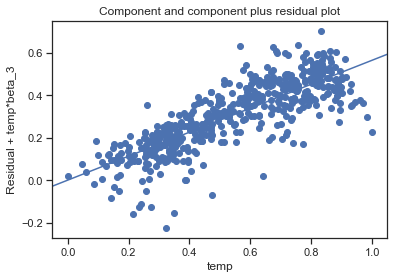

In [73]:
sm.graphics.plot_ccpr(lr6, 'temp')
plt.show()

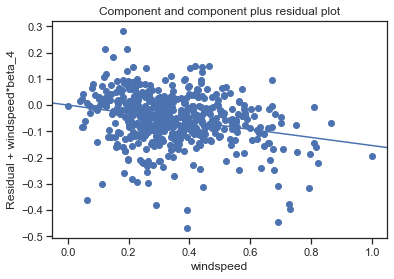

In [74]:
sm.graphics.plot_ccpr(lr6, 'windspeed')
plt.show()

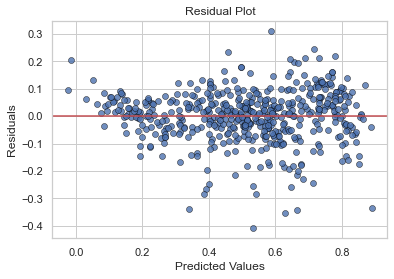

In [75]:
# Predict the target variable using the linear regression model
y_train_pred = lr6.predict(X_train_lm6)

# Calculate the residuals
residuals = y_train - y_train_pred

# Create a scatter plot of the residuals against the predicted values
sns.set(style='whitegrid')
sns.scatterplot(x=y_train_pred, y=residuals, alpha=0.8, edgecolor='black', linewidth=0.5)

# Add a horizontal line at y=0 to indicate zero residual
plt.axhline(y=0, color='r', linestyle='-')

# Set the axis labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Show the plot
plt.show()


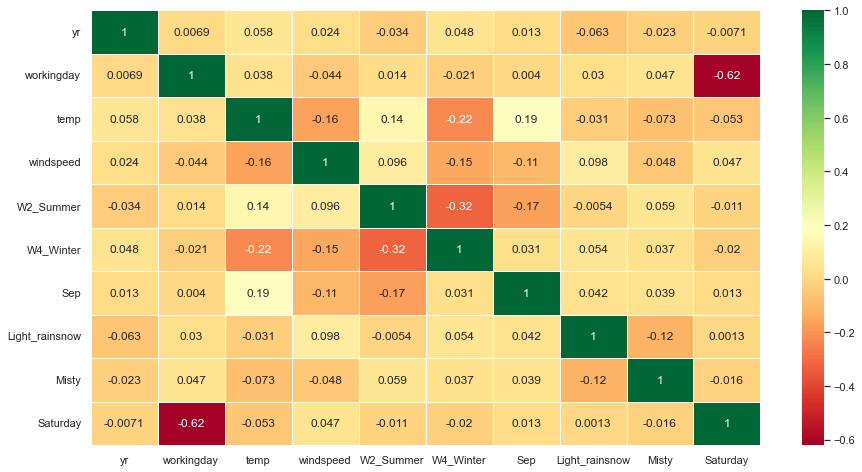

In [76]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [77]:
# Run the function to calculate VIF for the final model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.71
1,workingday,4.03
3,windspeed,4.03
0,yr,2.00
9,Saturday,1.65
4,W2_Summer,1.55
8,Misty,1.53
5,W4_Winter,1.38
6,Sep,1.20
7,Light_rainsnow,1.07


In [78]:
print('The Durbin-Watson value for Final Model lr 6 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Final Model lr 6 is 2.0296


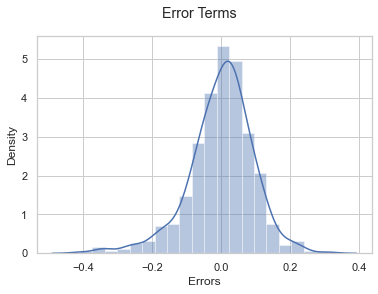

In [79]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

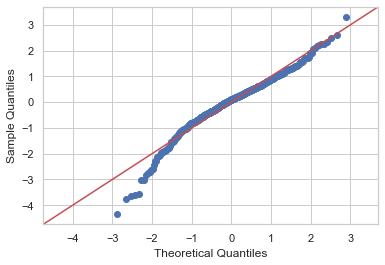

In [80]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

In [81]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.681818,20.553817,24.040727,63.749086,12.745665,4540.236364,0.268182,0.245455,...,0.086364,0.081818,0.036364,0.322727,0.154545,0.127273,0.150000,0.172727,0.145455,0.118182
std,0.501120,0.198531,0.466833,7.533926,8.188064,13.790510,5.184271,1911.199159,0.444023,0.431338,...,0.281541,0.274713,0.187620,0.468586,0.362295,0.334038,0.357886,0.378873,0.353363,0.323559
min,0.000000,0.000000,0.000000,3.957390,4.941955,29.000000,3.875669,506.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.189577,17.366525,53.260450,9.041851,3193.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.756250,24.762725,63.687500,12.146128,4593.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.119778,30.903325,73.333350,15.643227,5959.750000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,28.292425,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [83]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,W2_Summer,W3_Fall,W4_Winter,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
22,0,0,0,3.957390,4.941955,43.6522,16.522200,0,0,0,...,0,0,0,0,0,0,1,0,0,0
468,1,0,0,20.295000,24.399800,50.2917,12.791439,1,0,0,...,0,0,0,0,0,1,0,0,0,0
553,1,0,0,33.722500,39.519800,57.3750,8.417143,0,1,0,...,0,0,0,0,0,0,1,0,0,0
504,1,0,0,25.454153,29.198350,53.0417,17.042589,1,0,0,...,0,0,0,0,0,0,1,0,0,0
353,0,0,1,15.819153,19.822700,59.5417,4.125244,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [84]:
# Select the columns that are present in both the training and test datasets
common_cols = set(X_train_new.columns).intersection(set(X_test.columns))
X_test = X_test[common_cols]

# Add a constant variable to the test dataset
X_test_lm6 = sm.add_constant(X_test)

# Print information about the test dataset
X_test_lm6.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   temp            220 non-null    float64
 2   W4_Winter       220 non-null    uint8  
 3   Sep             220 non-null    uint8  
 4   Misty           220 non-null    uint8  
 5   Light_rainsnow  220 non-null    uint8  
 6   workingday      220 non-null    int64  
 7   windspeed       220 non-null    float64
 8   yr              220 non-null    int64  
 9   W2_Summer       220 non-null    uint8  
 10  Saturday        220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


In [85]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

Text(0, 0.5, 'y_pred')

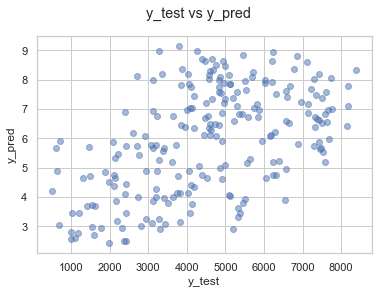

In [86]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 

In [87]:
r2 = round(r2_score(y_test, y_pred),4)
r2

-5.6534

In [88]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

-5.9717

In [89]:
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

4918.5644

In [90]:
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

4534.2787